# <font color='blue'> <div style='text-align: center'>Variability of Vertical Wind Shear </div>

## <font color='green'> TXT to CSV

In [1]:
import pandas as pd

# Defining the headers for each column
Headers = ["Year", "Month", "Day", "Hour", "40", "60", "80", "100", "120",
           "140", "150", "160", "180", "200", "225", "250"]

# Reading the txt file
dataset = pd.read_csv('Lidar_wind_vertical_profile.txt', delimiter=' ', header=None, names= Headers)

#Converting the txt file to csv
#df = dataset.to_csv('Lidar_wind_profile.csv', header=None, index=False)

dataset.head()

,Year,Month,Day,Hour,40,60,80,100,120,140,150,160,180,200,225,250
0,2014,8,1,0,3.52,4.16,4.58,4.83,5.02,5.24,5.44,5.60,5.68,5.68,5.83,5.81
1,2014,8,1,1,3.32,4.08,4.58,4.88,5.14,5.38,5.57,5.73,5.95,6.09,6.48,6.74
2,2014,8,1,2,3.03,3.64,4.15,4.48,4.80,5.12,5.35,5.52,5.74,5.97,6.63,6.72
3,2014,8,1,3,2.58,3.24,3.78,4.10,4.35,4.58,4.75,4.95,5.29,5.63,5.94,5.86
4,2014,8,1,4,3.13,3.82,4.32,4.56,4.69,4.87,5.08,5.16,5.28,5.60,6.19,6.18


## <font color='green'> Analysing and cleaning the data

In [ ]:
# Analysing if there is some missing data

# missing_data = dataset.isnull()
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print(missing_data[column].value_counts())
#     print('')


In [ ]:
# Cleaning the data

# Removing the unnecessary columns
# dataset.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

# Reseting the index
# dataset.reset_index(drop=True, inplace=True)

# dataset.head()

## <font color='green'> Regression Analysis First Row

In [2]:
# Importing dependencies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as sts
%matplotlib inline

In [3]:
# Locking the data in the first row and only the velocity columns

First_midnight_profile = dataset.iloc[[0], 4:].transpose() # Transposing the dataframe
First_midnight_profile.columns = ['V [m/s]'] # Renaming the column

#display(First_midnight_profile)

In [4]:
# Generating the fitted curves

x = First_midnight_profile['V [m/s]'].values # Creating a list with only the values for velocity
y = pd.to_numeric(First_midnight_profile.index.values) # Creating a list with only the values for height

p = []
for i in range(5):
    p.append(np.polyfit(x,y,i+1))
    
# Calculating R square
r2 = []
for j in range(len(p)):
    r = round(r2_score(y,np.polyval(p[j], x)), 5)
    r2.append(r)

# Choosing the best fit

best = r2.index(max(r2)) + 1
print('The {}º degree polynomial fit is the best one to represent this profile.'.format(best))

The 5º degree polynomial fit is the best one to represent this profile.


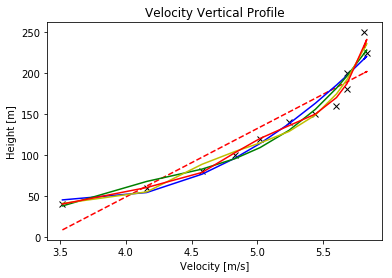

In [5]:
# Plotting the velocity vertical profile

plt.plot(x, y, 'kx') # Plotting the measured points
plt.plot(x, np.polyval(p[0], x), 'r--') # Linear regression
plt.plot(x, np.polyval(p[1], x), 'b-') # Polynomial regression, degree=2
plt.plot(x, np.polyval(p[2], x), 'g-') # Polynomial regression, degree=3
plt.plot(x, np.polyval(p[3], x), 'y-') # Polynomial regression, degree=4
plt.plot(x, np.polyval(p[4], x), 'r-') # Polynomial regression, degree=5

plt.title('Velocity Vertical Profile')
plt.xlabel('Velocity [m/s]')
plt.ylabel('Height [m]');

## <font color='green'> Logarithmic Analysis

In [6]:
#from sklearn.linear_model import LinearRegression
# Creating the logarithmic parameters

x_ln = np.log(y)
y_ln = np.log(x)

# Performing the linear regression

p_ln = np.polyfit(x_ln, y_ln, 1)
alpha = p_ln[0] # Alpha is the slope of the linear regression
intercept = p_ln[1] # The y-intercept represents V1

print(p_ln)
print('Alpha=', alpha)

[0.27567294 0.28919781]
Alpha= 0.27567293898867307


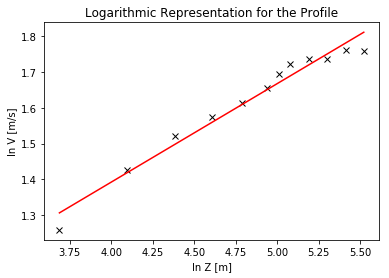

In [7]:
plt.plot(x_ln, y_ln, 'kx')
plt.plot(x_ln, np.polyval(p_ln, x_ln), 'r-')
plt.title('Logarithmic Representation for the Profile')
plt.xlabel('ln Z [m]')
plt.ylabel('ln V [m/s]');

## <font color='green'> Logarithimic Linear Regression Entire Data

In [8]:
# Defining the x and y values using the logarithmic values
x = np.log(pd.to_numeric(dataset.columns[4:].values))
y = []

for i in range(len(dataset)):
    y0 = np.log(dataset.iloc[i][4:].values)
    y.append(y0)

# Finding the alpha through the linear regression for each column of velocities
alphas = []
for j in range (len(y)):
    p = np.polyfit(x, y[j], 1)
    alpha = p[0]
    alphas.append(alpha)


In [9]:
dataset['Alphas'] = alphas
dataset.head()

,Year,Month,Day,Hour,40,60,80,100,120,140,150,160,180,200,225,250,Alphas
0,2014,8,1,0,3.52,4.16,4.58,4.83,5.02,5.24,5.44,5.60,5.68,5.68,5.83,5.81,0.275673
1,2014,8,1,1,3.32,4.08,4.58,4.88,5.14,5.38,5.57,5.73,5.95,6.09,6.48,6.74,0.365437
2,2014,8,1,2,3.03,3.64,4.15,4.48,4.80,5.12,5.35,5.52,5.74,5.97,6.63,6.72,0.431942
3,2014,8,1,3,2.58,3.24,3.78,4.10,4.35,4.58,4.75,4.95,5.29,5.63,5.94,5.86,0.450911
4,2014,8,1,4,3.13,3.82,4.32,4.56,4.69,4.87,5.08,5.16,5.28,5.60,6.19,6.18,0.348400


The median of alpha is: 0.311


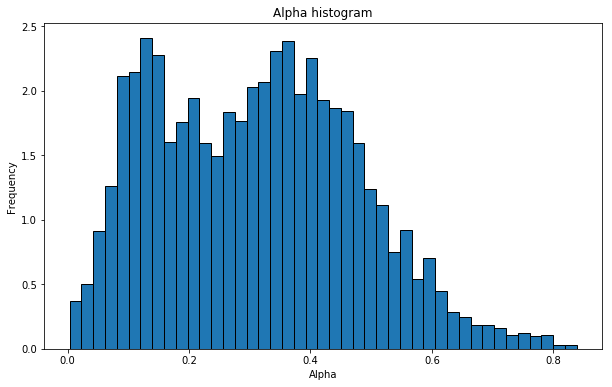

In [92]:
bins = int((min(dataset['Alphas'])+max(dataset['Alphas']))/0.02) + 1

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(dataset['Alphas'], bins, histtype='bar', edgecolor='black', density=True)
plt.title('Alpha histogram')
plt.xlabel('Alpha')
plt.ylabel('Frequency')

# Calculating the Normal distribution

# Locations where to compute the theoretical distribution
#ext = plt.xticks()[0]
#extmin, extmax = min(ext), max(ext)
#space = np.linspace(xmin, xmax, len(dataset['Alphas']))

#m, sigma = st.norm.fit(dataset['Alphas']) # Getting mean and standard deviation
#pdf_norm = st.norm.pdf(space, m, sigma) # Obtaining the theoretical values inside the interval

# Plotting a normal distribution for evaluation
#plt.plot(space, pdf_norm, label='Normal')

# Mean of alpha distribution
med = np.mean(dataset['Alphas'])
print('The median of alpha is:', round(med, 3))

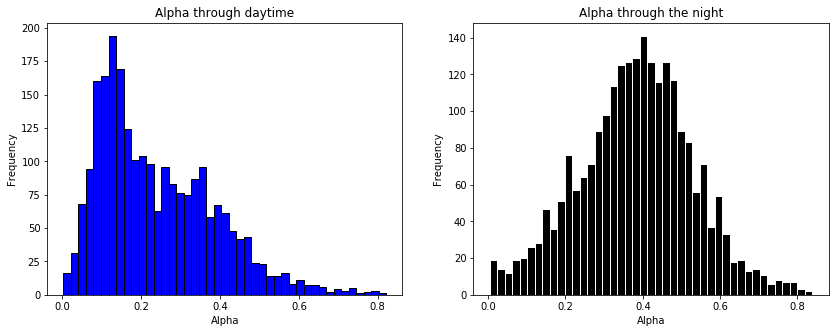

The median value for alpha during the day is 0.239.
Whereas the median value fo alpha during the night is 0.382


''

In [93]:
# Separating the data into day and night periods
Daytime = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
Nighttime = np.array([20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7])

Day = dataset[dataset.Hour.isin(Daytime)]
Night = dataset[dataset.Hour.isin(Nighttime)]

# Plotting alpha for the different periods in a day
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(Day['Alphas'], bins, histtype='bar', color='blue', edgecolor='black')
plt.title('Alpha through daytime')
plt.xlabel('Alpha')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Night['Alphas'], bins, histtype='bar', color='black', edgecolor='white')
plt.title('Alpha through the night')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.show()

med_day = np.mean(Day['Alphas'])
med_night = np.mean(Night['Alphas'])

print('The median value for alpha during the day is {}.\n\
Whereas the median value fo alpha during the night is {}'.format(round(med_day, 3), round(med_night, 3)))
;

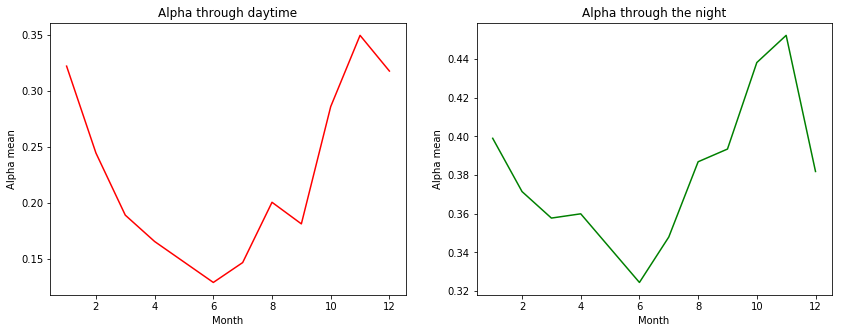

The mean value for alpha in July for daytime is: 0.147


In [129]:
# Grouping the data by month and returning the mean value for the alphas

Grouped_day = Day[['Month', 'Alphas']].groupby(['Month'], as_index=False).mean()
Grouped_night = Night[['Month', 'Alphas']].groupby(['Month'], as_index=False).mean()

# Plotting alpha for the different periods in a day
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(Grouped_day['Month'], Grouped_day['Alphas'], 'r-')
plt.title('Alpha through daytime')
plt.xlabel('Month')
plt.ylabel('Alpha mean')

plt.subplot(1, 2, 2)
plt.plot(Grouped_night['Month'], Grouped_night['Alphas'], 'g-')
plt.title('Alpha through the night')
plt.xlabel('Month')
plt.ylabel('Alpha mean')
plt.show()

July = Grouped_day['Alphas'].values[Grouped_day.Month == 7].item()
print('The mean value for alpha in July for daytime is:', round(July, 3))